# Nuclear Structure Excercise

## Simple pairing model

For Hamiltonian with pairing interaction,
$$\hat{H}=\hat{H}_0+\hat{V}$$ 
$$\hat{H}_0= \delta \sum_{p\sigma} (p-1)a^\dagger_{p\sigma} a_{p\sigma}$$ 
$$\hat{V} = -\frac{1}{2} g \sum_{pq} a^\dagger_{p+}a^\dagger_{p-} a_{q-}a_{q+}$$

System of 4-nucleons with $S=0$ in 4-possible paired states.

* Total number of possible 4-body states are 6. 
* Model space is taken up to 2p2h states

* Following code compares ground state energy with full configuration interactions and with (model space) truncated configurations

  H1 is full configuration up to 4p-4h
  
  H2 is truncated configuration up to 3p-3h

0
 -0.985 
 -0.135 
 -0.071 
 -0.071 
 -0.046 


C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


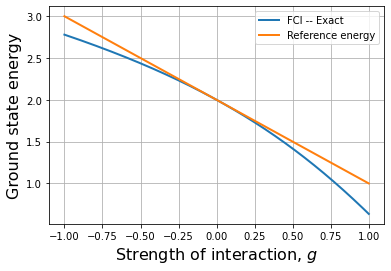

In [1]:
from numpy import *
from sympy import *
from matplotlib.pyplot import *
g_array = linspace(-1, 1, 1001)
e1_array = []
e2_array = []
for g in g_array:
    H1 = matrix([[2-g , -g/2., -g/2., -g/2., -g/2., 0],
        [-g/2., 4-g, -g/2., -g/2., 0., -g/2.],
        [-g/2., -g/2., 6-g, 0, -g/2., -g/2.],
        [-g/2., -g/2., 0, 6-g, -g/2., -g/2.],
        [-g/2., 0, -g/2., -g/2., 8-g, -g/2.],
        [0 , -g/2., -g/2., -g/2., -g/2., 10-g]])
    H2 = matrix([[2-g , -g/2., -g/2., -g/2., -g/2.],
        [-g/2., 4-g, -g/2., -g/2., 0.],
        [-g/2., -g/2., 6-g, 0, -g/2.],
        [-g/2., -g/2., 0, 6-g, -g/2.],
        [-g/2., 0, -g/2., -g/2., 8-g]])
    u1, v1 = linalg.eig(H1)
    u2, v2 = linalg.eig(H2)
    if g == 1./2:
        print( argmin(u1) )
        for i in range(5):
            print( " %.3f " % v2[i,0],)
    e1_array.append(min(u1))
    e2_array.append(min(u2))
plot(g_array, e1_array, linewidth=2.0)
#plot(g_array, e2_array, linewidth=2.0)
plot(g_array, (2-g_array), linewidth=2.0)
grid()
xlabel(r"Strength of interaction, $g$", fontsize=16)
ylabel(r'Ground state energy', fontsize=16)
#axis([-1,1,-0.4,0.05])
legend(['FCI -- Exact', 'Reference energy'])
#savefig("pairing.pdf")
show()


# Bit Counting

This is not complete. It does not make the $(a^\dagger_i)^2|0\rangle$ as $|0\rangle$ but returns $0|1\rangle$. 


In [19]:
import math

"""
A simple Python class for Slater determinant manipulation
Bit-manipulation stolen from:

http://wiki.python.org/moin/BitManipulation
"""

# bitCount() counts the number of bits set (not an optimal function)

def bitCount(int_type):
    """ Count bits set in integer """
    count = 0
    while(int_type):
        int_type &= int_type - 1
        count += 1
    return(count)


# testBit() returns a nonzero result, 2**offset, if the bit at 'offset' is one.

def testBit(int_type, offset):
    mask = 1 << offset
    return(int_type & mask) >> offset

# setBit() returns an integer with the bit at 'offset' set to 1.

def setBit(int_type, offset):
    mask = 1 << offset
    return(int_type | mask)

# clearBit() returns an integer with the bit at 'offset' cleared.

def clearBit(int_type, offset):
    mask = ~(1 << offset)
    return(int_type & mask)

# toggleBit() returns an integer with the bit at 'offset' inverted, 0 -> 1 and 1 -> 0.

def toggleBit(int_type, offset):
    mask = 1 << offset
    return(int_type ^ mask)

# binary string made from number

def bin0(s):
    return str(s) if s<=1 else bin0(s>>1) + str(s&1)

def bin(s, L = 0):
    ss = bin0(s)
    if L > 0:
        return '0'*(L-len(ss)) + ss
    else:
        return ss
    
    

class Slater:
    """ Class for Slater determinants """
    def __init__(self):
        self.word = int(0)

    def create(self, j):
        print(  "c^+_" + str(j) + " |" + bin(self.word) + ">  = ",)
        # Assume bit j is set, then we return zero.
        s = 0
        # Check if bit j is set.
        isset = testBit(self.word, j)
        if isset == 0:
            bits = bitCount(self.word & ((1<<j)-1))
            s = pow(-1, bits)
            self.word = setBit(self.word, j)

        print( str(s) + " x |" + bin(self.word) + ">" )
        return s
        
    def annihilate(self, j):
        print( "c_" + str(j) + " |" + bin(self.word) + ">  = ",)
        # Assume bit j is not set, then we return zero.
        s = 0
        # Check if bit j is set.
        isset = testBit(self.word, j)
        if isset == 1:
            bits = bitCount(self.word & ((1<<j)-1))
            s = pow(-1, bits)
            self.word = clearBit(self.word, j)

        print( str(s) + " x |" + bin(self.word) + ">" )
        return s



# Do some testing:

phi = Slater()
# create 0 
phi.create(0)
# test double create 
phi.create(0)
phi.create(1)

s = phi.annihilate(2)
s = phi.create(7)
s = phi.annihilate(0)
s = phi.create(20)

c^+_0 |0>  = 
1 x |1>
c^+_0 |1>  = 
0 x |1>
c^+_1 |1>  = 
-1 x |11>
c_2 |11>  = 
0 x |11>
c^+_7 |11>  = 
1 x |10000011>
c_0 |10000011>  = 
1 x |10000010>
c^+_20 |10000010>  = 
1 x |100000000000010000010>
